## Dragen Real Estate - Price Predictor

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

In [2]:
housing = pd.read_excel('data.csv.xlsx')

In [3]:
len(housing)

506

In [4]:
housing.head(16)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002E6A961C7C0>,
      dtype=object)

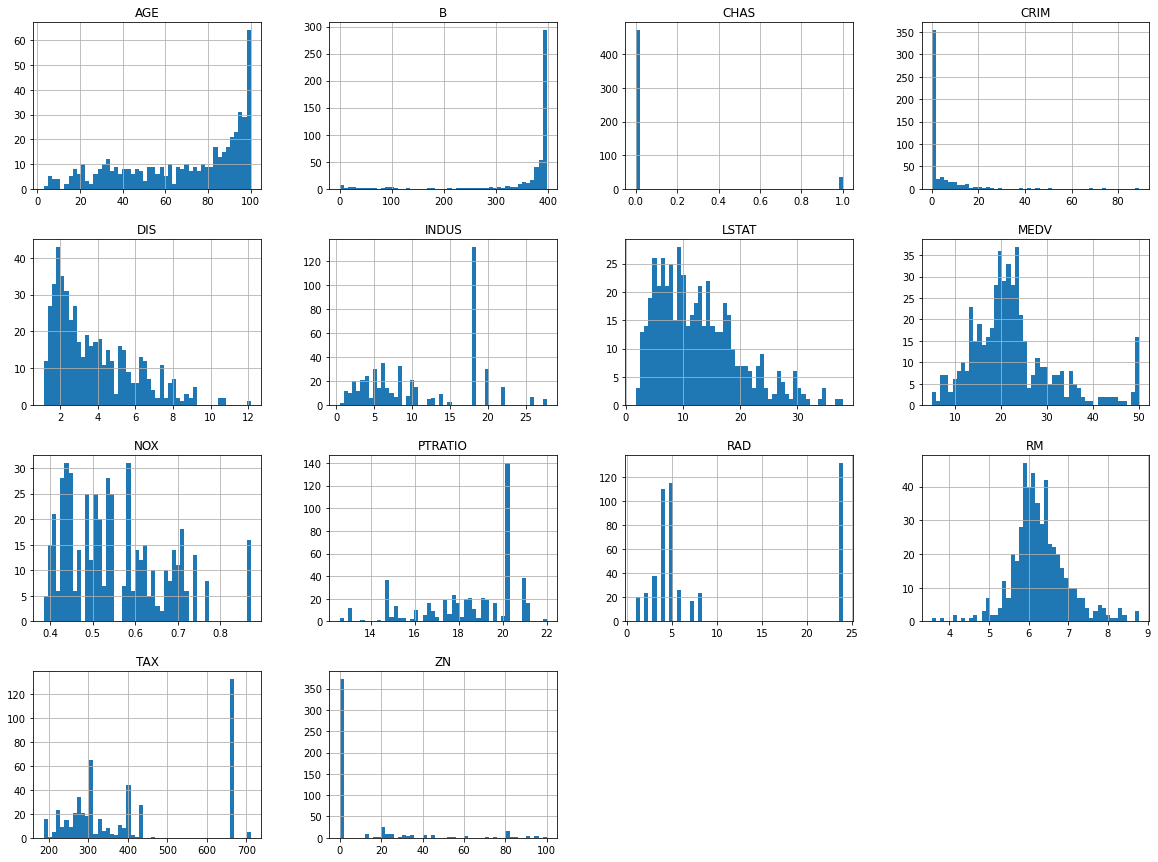

In [7]:
housing.hist(bins = 50 ,figsize = (20,15))

## Train Test Spliting


In [8]:
# for learning purpose 
def train_test_spliting(data,test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size :]
    return data.iloc[train_indices], data.iloc[test_indices]

In [9]:
# train_set, test_set = train_test_spliting(housing,0.2)

In [10]:
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_set , test_set = train_test_split(housing , test_size = 0.2 ,random_state = 42)

In [13]:
train_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666,20.2,349.48,24.91,12.0
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307,21.0,395.62,8.47,19.9
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83,19.4
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307,21.0,390.95,11.28,18.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.5200,5.836,91.9,2.2110,5,384,20.9,395.67,18.66,19.5
270,0.29916,20.0,6.96,0,0.4640,5.856,42.1,4.4290,3,223,18.6,388.65,13.00,21.1
348,0.01501,80.0,2.01,0,0.4350,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
435,11.16040,0.0,18.10,0,0.7400,6.629,94.6,2.1247,24,666,20.2,109.85,23.27,13.4


In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2,  random_state = 42)
for a, b in split.split(housing, housing["CHAS"]):
    strat_train_set = housing.loc[a]
    strat_test_set = housing.loc[b]
  
    

In [15]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [16]:
housing = strat_train_set.copy()

## Looking for correlation

In [17]:
Correlatin_matrix = housing.corr()

In [18]:
Correlatin_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002E6AA731640>,
      dtype=object)

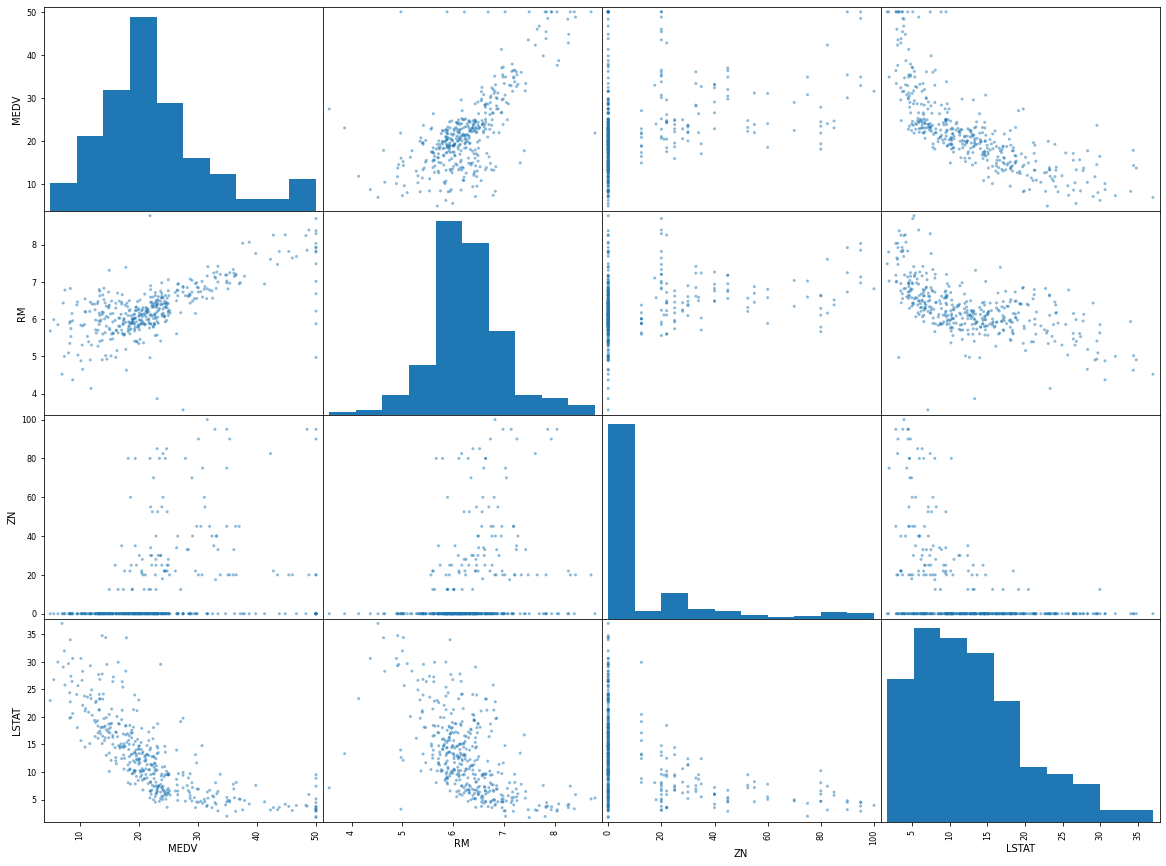

In [19]:
from pandas.plotting import scatter_matrix
atributes = ["MEDV" , "RM" , "ZN" , "LSTAT"]
scatter_matrix(housing[atributes], figsize = (20,15) )

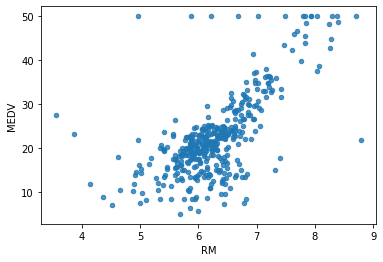

In [20]:
housing.plot(kind ="scatter" , x ="RM", y ="MEDV" , alpha = 0.8)

## Trying Out Attribute Combination


In [21]:
housing["TAXRM"] = housing["TAX"]/housing["RM"]

In [22]:
housing.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [23]:
corr_matrix = housing.corr()
corr_matrix["MEDV"].sort_values(ascending = False)

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.525160
LSTAT     -0.740494
Name: MEDV, dtype: float64

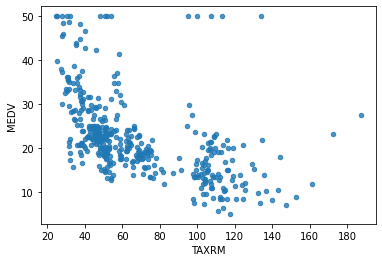

In [24]:
housing.plot(kind ="scatter" ,  x = "TAXRM" , y ="MEDV", alpha = 0.8)

In [25]:
housing = strat_train_set.drop("MEDV", axis =1)
housing_labels = strat_train_set["MEDV"].copy()

## Missing Attributs

1. Get rid of missing data points
2. Get rid of the whole attribute
3. Set the value 0, mean or median

 a = huosing.dropna(subset = ['RM']) # option 1
 a = housing.drop('RM' , axis =1 )  # option 2
   
median = housing['RM'].median() # option 3
housing['RM'].fillna(median)


In [26]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)


SimpleImputer(strategy='median')

In [27]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [28]:
X = imputer.transform(housing)


In [29]:
housing_tr = pd.DataFrame(X,columns=housing.columns)

In [30]:
housing_tr


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57
1,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
2,4.87141,0.0,18.10,0.0,0.614,6.484,93.6,2.3053,24.0,666.0,20.2,396.21,18.68
3,0.18159,0.0,7.38,0.0,0.493,6.376,54.3,4.5404,5.0,287.0,19.6,396.90,6.87
4,0.30347,0.0,7.38,0.0,0.493,6.312,28.9,5.4159,5.0,287.0,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,3.53501,0.0,19.58,1.0,0.871,6.152,82.6,1.7455,5.0,403.0,14.7,88.01,15.02
400,7.05042,0.0,18.10,0.0,0.614,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
401,0.08187,0.0,2.89,0.0,0.445,7.820,36.9,3.4952,2.0,276.0,18.0,393.53,3.57
402,4.75237,0.0,18.10,0.0,0.713,6.525,86.5,2.4358,24.0,666.0,20.2,50.92,18.13


## Scikit- Learn Design

Primarily, three types of object
1. Estimeter (ex. = imputer)
It has fit method and transform method
fit method = Fit the datasets and calculate internal parameters
2. Transformer
transform method takes input and returns output based one the learning from fit. It also has a convenience function called fit_transform() which fit and transform.
3. Predictors
LinearRegression is example of predictor . Fit predict are two commen functions.

## Feature Scaling

Primarily 2 types
1. min-max scaling (normalization) vale 0 se 1 , 
sklearn provide a class called MinMaxScaler 
(value - min)/(max - min)
2. Standredizaton
(value - mean)/ std
sklearn provides a class called Standred Scaler 


## Creating a Pipe-line


In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    ("std_scaler", StandardScaler()),
])

In [32]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [33]:
housing_num_tr.shape

(404, 13)

In [34]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

## Selecting a desired model for dragon real estate

In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(housing_num_tr, housing_labels)

LinearRegression()

In [36]:
some_data =housing.iloc[:5]

In [37]:
some_labels = housing_labels.iloc[:5]

In [38]:
prepared_data = my_pipeline.transform(some_data)

In [39]:
model.predict(prepared_data)

array([23.94996893, 27.21690623, 20.58079789, 25.04088721, 23.76177838])

In [40]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [41]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

In [42]:
lin_mse

23.322346079233675

In [43]:
lin_rmse

4.829321492635759

In [44]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor()
model2.fit(housing_num_tr, housing_labels)
housing_prediction = model2.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_prediction)
rmse = np.sqrt(lin_mse)

In [45]:
lin_mse

23.322346079233675

In [46]:
# overfit kr liya h


## Using better evalution technique - Cross Validation

In [47]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring = "neg_mean_squared_error", cv =10)
rmse_scores = np.sqrt(-scores)

In [48]:
 rmse_scores

array([4.21674442, 4.26026816, 5.1071608 , 3.82881892, 5.34093789,
       4.3785611 , 7.47384779, 5.48226252, 4.14885722, 6.0669122 ])

In [49]:
 from sklearn.model_selection import cross_val_score
scores = cross_val_score(model2, housing_num_tr, housing_labels, scoring = "neg_mean_squared_error", cv =10)
rmse_scores = np.sqrt(-scores)

In [50]:
rmse_scores

array([3.92919032, 5.68506816, 5.27636238, 4.01834209, 4.08181945,
       3.08881045, 5.10690709, 3.91426877, 3.11741078, 3.83174242])

In [51]:
def print_scores(scores):
    print("Scores:" , scores)
    print("Mean: ", scores.mean())
    print("Standard devation" , scores.std())


In [52]:
print_scores(rmse_scores)

Scores: [3.92919032 5.68506816 5.27636238 4.01834209 4.08181945 3.08881045
 5.10690709 3.91426877 3.11741078 3.83174242]
Mean:  4.204992192186563
Standard devation 0.8324972307820596


In [53]:
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor()
model3.fit(housing_num_tr, housing_labels)
housing_prediction = model3.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_prediction)
rmse = np.sqrt(lin_mse)

In [54]:
 from sklearn.model_selection import cross_val_score
scores = cross_val_score(model3, housing_num_tr, housing_labels, scoring = "neg_mean_squared_error", cv =10)
rmse_scores = np.sqrt(-scores)

In [55]:
print_scores(rmse_scores)

Scores: [2.90453376 2.96258517 4.39450731 2.65421325 3.42244618 2.56683324
 4.6924288  3.32690715 3.08976807 3.26684847]
Mean:  3.328107140844087
Standard devation 0.6644346466984704


## Saving the model

from joblib import dump, load
dump(model, "Dragon.joblib")

# import model

from joblib import dump, load
model = load("Dragon.joblib")

## Testing the model on the test data

In [57]:
X_test = strat_test_set.drop("MEDV" , axis =1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model3.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [58]:
final_rmse

2.9147791797435816

In [59]:
from sklearn.metrics import r2_score

In [60]:
r2_score(Y_test, final_predictions)

0.8799019915633315